### Excercise 4.1
$$
q_\pi(11, \text{down}) = -1 + v_\pi(s_{terminal}) = -1 + 0 = -1
$$

$$
q_\pi(7, \text{down}) = -1 + v_\pi(11) = -1 + (-14) = -15
$$

### Excercise 4.2

a) If the transitions of the original states are unchanged
$$
v_\pi(15) = -1 + 0.25 * (-22) + 0.25 * (-20) + 0.25 * (-14) + 0.25 * v_\pi(15)
$$
$$
4v_\pi(15) = -4 -22 - 20 - 14 + v_\pi(15)
$$
$$
3v_\pi(15) = -60
$$
$$
v_\pi(15) = -20
$$

b) If the transitions changed

### Excercise 4.3
$$
q_{k+1}(s, a) = \sum_{s', r} p(s', r | s, a) \left[r + \gamma \sum_{a'} \pi(a'|s') q_k(s', a') \right]
$$

### Excercise 4.4

The problem is that the $\argmax_a$ breaks the ties arbitrarily, so it can switch between actions of equal value forever.

It can be solved by assigning a unique number $n(a)$ to each action $a$, and replace $\argmax_a q_\pi(s, a)$ with $\argmax_a (q_\pi(s, a), n(a))$

### Excercise 4.5

#### 1. Initialization
$Q(s, a) \in \mathbb{R} $ and $\pi(s) \in \mathcal{A}$ arbitrarily for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$; $Q(terminal, a) = 0$

#### 2. Policy Evaluation
1. Loop:
    1. $\Delta \leftarrow 0$
    2. Loop for each $s \in S$, $a \in \mathcal{A}$
        1. $q \leftarrow Q(s, a)$
        2. $Q(s, a) = \sum_{s', r} p(s', r | s, a) \left[r + \gamma Q(s', \pi(s')) \right]$
        3. $\Delta \leftarrow max(\Delta, |q - Q(s,a)|)$
2. until $\Delta < \theta$


#### 3. Policy improvement
1. $policy\text{-}stable \leftarrow true$
2. For each $s \in S$:
    1. $old\text{-}action \leftarrow \pi(s)$
    2. $\pi(s) \leftarrow \argmax_a Q(s, a)$
    3. If $old\text{-}action \neq \pi(s)$, then $policy\text{-}stable \leftarrow false$
3. If $policy\text{-}stable$, then stop and return $Q \approx q_*$; else go to Policy Evaluation.

### Excercise 4.6

1. Initialization:
    * $\pi$ should satisfy the given condition: $\pi(s|a) \geq \varepsilon/|\mathcal{A}(s)|$
2. Policy evaluation:
    * We need to rewrite the Bellman equation to use stochastic policies: $V(s) \rightarrow \sum_{a} \pi(s|a) \sum_{s', r} p(s', r | s, a) [r + \gamma V(s)]$
3. Policy improvement:
    * We need to change the update of $\pi$:
        * $a_{best} \leftarrow \argmax_a \sum_{s', r} p(s', r | s, a) [r + \gamma V(s)]$
        * $\pi(a|s) \leftarrow \varepsilon/|\mathcal{A}(s)|$ for all $a \neq a_{best}$
        * $\pi(a_{best}|s) \leftarrow 1 - \frac{\varepsilon}{|\mathcal{A}(s)|} * (|\mathcal{A}(s)| - 1)$



### Excercise 4.8

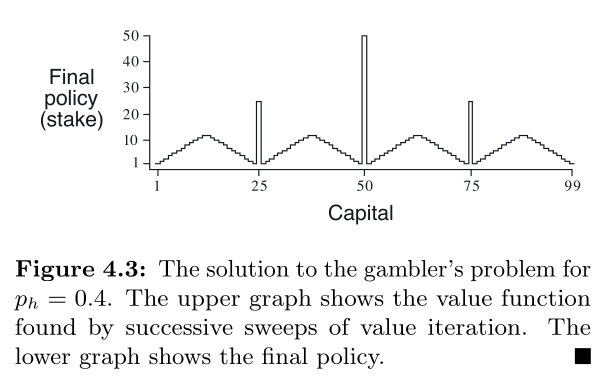

* For capital of 50 it makes sense to bet everything, because then we have $p_h = 0.45$ chance of getting 100 and winning the game.
* For capital of 51 it makes more sense to bet one coin. If we we, then we have 52. If we loose, we are again on 50, where we can bet everything and have $p_h = 0.45$ chance of winning the game. For the same reason we can bet 2 coins on 52, 3 on 53 etc.
* On 75 we can bet 25, because then we have $p_h$ chance of getting 100 and winning, if we loose this bet we are back to 50, where we can bet everything.
* On 25 we can bet all because of $p_h$ chance of getting 50 and then bet 50.

### Excercise 4.10

$$
q_{k+1}(s, a) = \sum_{s', r}p(s', r | s, a) \left[r + \gamma \max_{a'}q_k(s', a') \right]
$$